In [103]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
from country_codes import eurostat_dictionary
import eurostat
import matplotlib.pyplot as plt
from dowhy.causal_identifier import backdoor

from warnings import filterwarnings
filterwarnings('ignore')
from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

EU_countries = ['Belgium', 'Bulgaria', 'Czechia', 'Denmark',
'Germany (until 1990 former territory of the FRG)', 'Germany','Estonia',
'Ireland', 'Greece', 'Spain', 'France', 'Croatia', 'Italy',
'Cyprus', 'Latvia', 'Lithuania', 'Luxembourg', 'Hungary', 'Malta',
'Netherlands', 'Austria', 'Poland', 'Portugal', 'Romania',
'Slovenia', 'Slovakia', 'Finland', 'Sweden', 'United Kingdom',
'Iceland', 'Liechtenstein', 'Norway', 'Switzerland',
'Bosnia and Herzegovina']

COUNTRY = "Netherlands"

from main_import import process_country

# Call the function to process the outcome for the year 2020
df_outcome_2010, df_outcome_2020 = process_country('Netherlands')

# Unemployment rates by sex, age and citizenship (%)

In [6]:
df_n = eurostat.get_data_df('lfsa_urgan') 
df_n.rename({'geo\TIME_PERIOD':'geo'},inplace=True,axis=1)

df_n['country'] = df_n['geo'].replace(eurostat_dictionary)
df_n = df_n[df_n['country'] == COUNTRY]
df_n = df_n[df_n['citizen'] =='NAT']
print(df_n['age'].unique())

df_n.drop(['geo', 'freq', 'unit', 'citizen'],axis=1,inplace=True)
ages = ['Y15-19', 'Y15-24', 'Y15-29', 'Y15-39', 'Y20-24', 'Y20-29', 'Y25-29', 'Y30-34' ]
# keep only these ages


df_n.set_index(['sex', 'age', 'country'], inplace=True)
df_n= df_n[df_n.index.get_level_values('age').isin(ages)]
df_n= df_n[['2010', '2020']]

df_n_unemployment_rate_PC = df_n
df_n_unemployment_rate_PC

['Y15-19' 'Y15-24' 'Y15-29' 'Y15-39' 'Y15-59' 'Y15-64' 'Y15-74' 'Y20-24'
 'Y20-29' 'Y20-64' 'Y25-29' 'Y25-49' 'Y25-54' 'Y25-59' 'Y25-64' 'Y25-74'
 'Y30-34' 'Y35-39' 'Y40-44' 'Y40-59' 'Y40-64' 'Y45-49' 'Y50-54' 'Y50-59'
 'Y50-64' 'Y50-74' 'Y55-59' 'Y55-64' 'Y60-64' 'Y65-69' 'Y65-74' 'Y70-74']


2010  2020
sex age    country                
F   Y15-19 Netherlands  12.7  10.3
    Y15-24 Netherlands   9.9   8.6
    Y15-29 Netherlands   8.0   6.5
    Y15-39 Netherlands   6.2   4.9
    Y20-24 Netherlands   7.7   7.2
    Y20-29 Netherlands   6.2   5.0
    Y25-29 Netherlands   4.8   3.2
    Y30-34 Netherlands   3.9   2.8
M   Y15-19 Netherlands  13.5  10.8
    Y15-24 Netherlands  11.6   8.9
    Y15-29 Netherlands   8.5   7.0
    Y15-39 Netherlands   5.7   5.1
    Y20-24 Netherlands  10.2   7.3
    Y20-29 Netherlands   6.7   5.6
    Y25-29 Netherlands   3.5   4.2
    Y30-34 Netherlands   2.6   2.6
T   Y15-19 Netherlands  13.1  10.5
    Y15-24 Netherlands  10.8   8.7
    Y15-29 Netherlands   8.2   6.7
    Y15-39 Netherlands   5.9   5.0
    Y20-24 Netherlands   8.9   7.3
    Y20-29 Netherlands   6.4   5.3
    Y25-29 Netherlands   4.1   3.7
    Y30-34 Netherlands   3.3   2.7

# Long-term Youth Unemployment 

In [7]:

def long_term_youth_unemployment(COUNTRY, SEX = None):
    df_n = eurostat.get_data_df('yth_empl_130') # Long-term youth unemployment
    df_n.rename({'geo\TIME_PERIOD':'geo'},inplace=True,axis=1)
    df_n.drop(['unit', 'freq'],axis=1,inplace=True)
    df_n['country'] = df_n['geo'].replace(eurostat_dictionary)
    df_n.drop(['geo'],axis=1,inplace=True)


    df_n = df_n[df_n['country'] == COUNTRY]
    # df_n = df_n[df_n['sex'] == SEX]

    df_n.set_index(['sex', 'age', 'country'], inplace=True)

    return df_n

df_n = long_term_youth_unemployment('Netherlands')

df_n= df_n[['2010', '2020']]
df_n_LT_unemployment = df_n
df_n

,,,2010,2020
sex,age,country,,
F,Y15-29,Netherlands,0.9,0.6
M,Y15-29,Netherlands,1.2,0.9
T,Y15-29,Netherlands,1.1,0.7


# Mobile students from abroad enrolled by education level, sex and country of origin

In [221]:

 def students_from_abroad_by_level_and_field(COUNTRY):
    df_n = eurostat.get_data_df('educ_momo_fld')
    df_n.rename({'geo\TIME_PERIOD':'geo'},inplace=True,axis=1)
    # df_n.drop(['unit', 'freq'],axis=1,inplace=True)
    df_n['country'] = df_n['geo'].replace(eurostat_dictionary)
    df_n.drop(['geo'],axis=1,inplace=True)

    # Inward mobile students as percentage of student population in the host country (%)

    df_n = df_n[df_n['country'] == COUNTRY]
    df_n = df_n[df_n['field'] == 'TOTAL']
    df_n = df_n[df_n['indic_ed'] == 'MS01_2P']
    
    return df_n

df_n = students_from_abroad_by_level_and_field('Netherlands')


df_n = students_from_abroad_by_level_and_field('Belgium')
df_n

,freq,isced97,field,indic_ed,2008,2009,2010,2011,2012,country
1633,A,ED5,TOTAL,MS01_2P,NaN,7.62,7.26,7.55,8.22,Belgium
3298,A,ED5A,TOTAL,MS01_2P,NaN,10.98,10.89,11.55,12.53,Belgium
4754,A,ED5B,TOTAL,MS01_2P,NaN,4.30,3.78,3.63,4.03,Belgium
6415,A,ED5_6,TOTAL,MS01_2P,NaN,7.99,8.11,8.19,8.99,Belgium
7948,A,ED6,TOTAL,MS01_2P,NaN,20.26,35.61,29.78,34.20,Belgium


# Average student debts per age category (Dutch students)

In [81]:
file_path = 'table_tabel-ef26b4a9-7b08-42a9-b76c-a50afbfde19c.csv'

student_debt_df= pd.read_csv(file_path, sep=',')
student_debt_df = student_debt_df[student_debt_df['Jaar'].isin(['2011', '2020'])]
# multiply all values by 1000

student_debt_df

,Jaar,Totaal (1 000 euro),Tot 20 jaar (1 000 euro),20 tot 25 jaar (1 000 euro),25 tot 30 jaar (1 000 euro),30 jaar en ouder (1 000 euro)
0,2011,"12,6","2,5","8,1","17,6","14,9"
9,2020,"15,3","3,7","12,8","18,6","17,6"


# Available houses for rent

In [78]:

# Assuming your CSV data is in a file named 'data.csv'
file_path = 'table_tabel-1c5c9e98-d6b6-4a91-99a4-52fa29f14feb.csv'

huurwoningen_df= pd.read_csv(file_path, sep=',')
huurwoningen_df = huurwoningen_df[['Gereguleerde huurwoningen1) (%)', 'categories1']]
huurwoningen_df = huurwoningen_df[huurwoningen_df['categories1'].isin(['2012', '2021'])]

huurwoningen_df 


,Gereguleerde huurwoningen1) (%),categories1
0,"33,62",2021
3,"37,12",2012


# Students enrolled in tertiary education by education level, programme orientation, sex and age

In [10]:

df_n = eurostat.get_data_df('educ_uoe_enrt02')
df_n.rename({'geo\TIME_PERIOD':'geo'},inplace=True,axis=1)
df_n.drop(['unit', 'freq'],axis=1,inplace=True)
df_n['country'] = df_n['geo'].replace(eurostat_dictionary)
df_n.drop(['geo'],axis=1,inplace=True)


df_n = df_n[df_n['country'] == COUNTRY]
df_n = df_n[df_n['isced11'] == 'ED5-8']
df_n = df_n[df_n['age'] == 'TOTAL']

df_n.set_index(['sex', 'age', 'country'], inplace=True)
df_n

,,,isced11,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
sex,age,country,,,,,,,,,,,
F,TOTAL,Netherlands,ED5-8,NaN,347666.0,360540.0,440744.0,434637.0,457757.0,463184.0,476034.0,493008.0,523188.0
M,TOTAL,Netherlands,ED5-8,NaN,327086.0,341643.0,401857.0,402309.0,417698.0,426322.0,437116.0,444413.0,464376.0
T,TOTAL,Netherlands,ED5-8,NaN,674752.0,702183.0,842601.0,836946.0,875455.0,889506.0,913150.0,937421.0,987564.0


# Share of young adults aged 18-34 living with their parents by self-defined current economic status - EU-SILC survey

In [11]:
# Employed persons working full-time
# [EMP_FT]
# Employed persons working part-time
# [EMP_PT]
# Unemployed persons
# [UNE]
# Students
# [EDUC]
# Other persons outside the labour force (former name: inactive persons)
# [INAC_OTH]

# Share of young adults aged 18-34 living with their parents by self-defined current economic status - EU-SILC survey (

df_n = eurostat.get_data_df('ilc_lvps09')
df_n.rename({'geo\TIME_PERIOD':'geo'},inplace=True,axis=1)
df_n.drop(['unit', 'freq'],axis=1,inplace=True)
df_n['country'] = df_n['geo'].replace(eurostat_dictionary)
df_n.drop(['geo'],axis=1,inplace=True)

df_n = df_n[df_n['country'] == COUNTRY]
# df_n = df_n[df_n['sex'] == SEX]
# df_n.set_index(['sex', 'age', 'country'], inplace=True)
df = df_n[['country', 'age','wstatus', '2010']]
df_outcome_2010 = df
df = df_n[['country', 'age','wstatus', '2020']]
df_outcome_2020 = df
df_outcome_2020 

,country,age,wstatus,2020
33,Netherlands,Y18-24,EDUC,61.8
78,Netherlands,Y18-34,EDUC,53.7
123,Netherlands,Y25-34,EDUC,14.1
168,Netherlands,Y18-24,EMP_FT,15.5
213,Netherlands,Y18-34,EMP_FT,19.7
258,Netherlands,Y25-34,EMP_FT,40.6
303,Netherlands,Y18-24,EMP_PT,17.0
348,Netherlands,Y18-34,EMP_PT,19.9
393,Netherlands,Y25-34,EMP_PT,34.1
438,Netherlands,Y18-24,INAC_OTH,2.9


# yth_demo_030: Estimated avrage age of young people leaving the parental household by sex

In [12]:
df_n = eurostat.get_data_df('yth_demo_030')
df_n.rename({'geo\TIME_PERIOD':'geo'},inplace=True,axis=1)
df_n.drop(['unit', 'freq'],axis=1,inplace=True)
df_n['country'] = df_n['geo'].replace(eurostat_dictionary)
df_n.drop(['geo'],axis=1,inplace=True)

df_n = df_n[df_n['country'] == COUNTRY]
df_n

,sex,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,country
24,F,21.9,22.2,22.4,22.4,22.3,22.1,22.2,22.3,22.3,...,22.8,22.9,22.8,22.9,23.0,23.0,23.6,22.6,22.4,Netherlands
59,M,24.1,24.5,24.6,24.6,24.6,24.4,24.5,24.4,24.4,...,24.5,24.5,24.5,24.3,24.4,24.4,24.9,23.8,23.5,Netherlands
94,T,23.1,23.4,23.5,23.5,23.5,23.3,23.4,23.4,23.3,...,23.6,23.7,23.7,23.6,23.7,23.7,24.3,23.2,23.0,Netherlands


# Daily consumption of fruit and vegetables by sex, age and educational attainment level

In [13]:

df_n = eurostat.get_data_df('HLTH_EHIS_FV3E$DV_1143'
)
df_n.rename({'geo\TIME_PERIOD':'geo'},inplace=True,axis=1)

df_n['country'] = df_n['geo'].replace(eurostat_dictionary)
df_n.drop(['geo'],axis=1,inplace=True)
df_n.drop(['freq',  'sex'],axis=1,inplace=True)
# df_n = df_n[df_n['unit'] == 'PC']
# df_n = df_n[df_n['sex'] == 'T']
df_n = df_n[df_n['country'] == COUNTRY]
df_n
# GE5 == 5 portions or more


,unit,n_portion,isced11,age,2014,2019,country
22,PC,0,TOTAL,Y15-29,58.8,51.4,Netherlands
55,PC,1-4,TOTAL,Y15-29,23.3,23.9,Netherlands
88,PC,GE5,TOTAL,Y15-29,17.9,24.7,Netherlands


# First time marrying persons by age and sex

In [122]:

df_n = eurostat.get_data_df('demo_nsinagec')
df_n.rename({'geo\TIME_PERIOD':'geo'},inplace=True,axis=1)

df_n['country'] = df_n['geo'].replace(eurostat_dictionary)
df_n.drop(['geo'],axis=1,inplace=True)
df_n.drop(['freq'],axis=1,inplace=True)
# df_n = df_n[df_n['unit'] == 'PC']
# df_n = df_n[df_n['sex'] == 'T']
df_n = df_n[df_n['country'] == COUNTRY]
df_n['age'].unique()

ages = ['Y25-29', 'Y20-24', 'Y30-34', 'Y15-19']

df_n.set_index(['age', 'country'], inplace=True)
df_n= df_n[df_n.index.get_level_values('age').isin(ages)]
df_n= df_n[['2010', '2020']]

# Y18-34 : 'Y20-24' + 'Y25-29' + 'Y30-34'
young_people_married = df_n
young_people_married = young_people_married.reset_index()

young_people_married = young_people_married.groupby(['age', 'country']).sum()
young_people_married


,,2010,2020
age,country,,
Y15-19,Netherlands,1061.0,415.0
Y20-24,Netherlands,16750.0,8967.0
Y25-29,Netherlands,35918.0,21605.0
Y30-34,Netherlands,28777.0,19752.0


# Young immigrants by sex, age and country of birth (proxy for incoming international students?)

In [200]:
df_n = eurostat.get_data_df('yth_demo_070')
df_n.rename({'geo\TIME_PERIOD':'geo'},inplace=True,axis=1)

df_n['country'] = df_n['geo'].replace(eurostat_dictionary)
df_n.drop(['geo'],axis=1,inplace=True)
df_n.drop(['agedef'],axis=1,inplace=True)
df_n = df_n[df_n['unit'] == 'NR']
df_n = df_n[df_n['sex'] == 'T']
df_n = df_n[df_n['country'] == COUNTRY]
df_n = df_n[df_n['c_birth'] == 'TOTAL']
df_n = df_n.groupby(['age', 'country']).sum()
df_n


,,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
age,country,,,,,,,,,,,,,,
Y15-19,Netherlands,0.0,0.0,8616.0,8806.0,9119.0,10016.0,11286.0,14134.0,16825.0,16752.0,16644.0,18746.0,16527.0,23826.0
Y15-29,Netherlands,0.0,0.0,56949.0,59110.0,56427.0,57312.0,64576.0,74105.0,84445.0,83822.0,85601.0,94202.0,79140.0,99951.0
Y20-24,Netherlands,0.0,0.0,24759.0,25476.0,23594.0,22964.0,25932.0,29222.0,32706.0,32065.0,32060.0,34576.0,29514.0,37355.0
Y25-29,Netherlands,0.0,0.0,23574.0,24828.0,23714.0,24332.0,27358.0,30749.0,34914.0,35005.0,36897.0,40880.0,33099.0,38770.0


# Monthly minimum wage as a proportion of average monthly earnings (%) - NACE Rev. 2 (from 2008 onwards)

In [201]:

df_n = eurostat.get_data_df('earn_mw_avgr2')
df_n.rename({'geo\TIME_PERIOD':'geo'},inplace=True,axis=1)

df_n['country'] = df_n['geo'].replace(eurostat_dictionary)
df_n.drop(['geo', 'freq', 'unit'],axis=1,inplace=True)

df_n = df_n[df_n['indic_se'] == 'MMW_MEAN_ME_PP']
df_n = df_n[df_n['country'] == COUNTRY]

df_n = df_n[df_n['nace_r2'] == 'B-N']

minimum_wage_PC = df_n

print(minimum_wage_PC[['2010']])

    2010
17  44.2


# Housing cost overburden rate by degree of urbanisation - EU-SILC survey

In [150]:
df_n = eurostat.get_data_df('ilc_lvho07d')
df_n.rename({'geo\TIME_PERIOD':'geo'},inplace=True,axis=1)

df_n['country'] = df_n['geo'].replace(eurostat_dictionary)
df_n.drop(['geo'],axis=1,inplace=True)
# df_n.drop(['agedef'],axis=1,inplace=True)
# df_n = df_n[df_n['unit'] == 'PC']
# df_n = df_n[df_n['sex'] == 'T']
df_n = df_n[df_n['deg_urb'] == 'DEG1']
df_n = df_n[df_n['country'] == COUNTRY]
print(df_n['2010'])

print(df_n['2020'])

32    14.6
Name: 2010, dtype: float64
32    10.7
Name: 2020, dtype: float64


# Rent Price evolution

Inflation between 2010 and 2021 developed fairly similarly as rents with a total increase of 17 %. There has been inflation in all Member States during this period, with increases of 25 % or more in Hungary (+33 %), Romania (+31 %), Estonia (+30 %) and Lithuania (+25 %). The lowest price increases were observed in Greece (+2 %), Cyprus (+7 %) and Ireland (+8 %).


In [171]:
df_n = eurostat.get_data_df('prc_hicp_aind')
df_n.rename({'geo\TIME_PERIOD':'geo'},inplace=True,axis=1)

df_n['country'] = df_n['geo'].replace(eurostat_dictionary)
df_n.drop(['geo', 'freq'],axis=1,inplace=True)
df_n = df_n[df_n['country'] == COUNTRY]

df_n = df_n[df_n['coicop'] == 'CP041']
df_n = df_n[df_n['unit'] == 'INX_A_AVG']

#  Rent evolution
# Annual average index - Actual rentals for housing

rentals_df = df_n

# Total Inflation

In [173]:

df_n = eurostat.get_data_df('prc_hicp_aind')
df_n.rename({'geo\TIME_PERIOD':'geo'},inplace=True,axis=1)

df_n['country'] = df_n['geo'].replace(eurostat_dictionary)
df_n.drop(['geo', 'freq'],axis=1,inplace=True)
df_n = df_n[df_n['country'] == COUNTRY]

df_n = df_n[df_n['coicop'] == 'CP00']
df_n = df_n[df_n['unit'] == 'INX_A_AVG']
total_inflation = df_n

# Merging the dataframes

In [19]:
df1 = df_n_unemployment_rate_PC
df2 = df_outcome_2020
df1.reset_index(drop=False, inplace=True)
df2.reset_index(drop=False, inplace=True)


In [148]:
df1 = df_n_unemployment_rate_PC
df1 = df1[df1['age'] == 'Y30-34']
df1 = df1[df1['sex'] == 'T']
df1

df1 = df_n_unemployment_rate_PC
df1 = df1[df1['age'] == 'Y25-29']
df1 = df1[df1['sex'] == 'T']
print(df1)
# averaging over the two age groups to obtain Y25-34 (2010)
(4.1 + 3.3)/2
# averaging over the two age groups to obtain Y25-34 (2020)
(2.7 + 3.7)/2

   sex     age      country  2010  2020
22   T  Y25-29  Netherlands   4.1   3.7


In [146]:
df1 = df_n_unemployment_rate_PC
df1 = df1[df1['age'] == 'Y15-39']
df1 = df1[df1['sex'] == 'T']
print(df1)

df1 = df_n_unemployment_rate_PC
df1 = df1[df1['age'] == 'Y15-24']
df1 = df1[df1['sex'] == 'T']
print(df1)

   sex     age      country  2010  2020
19   T  Y15-39  Netherlands   5.9   5.0
   sex     age      country  2010  2020
17   T  Y15-24  Netherlands  10.8   8.7


In [228]:
def share_young_with_parents(COUNTRY):
    """
    # Employed persons working full-time
    # [EMP_FT]
    # Employed persons working part-time
    # [EMP_PT]
    # Unemployed persons
    # [UNE]
    # Students
    # [EDUC]
    # Other persons outside the labour force (former name: inactive persons)
    # [INAC_OTH]
    """
    df_n = eurostat.get_data_df('ilc_lvps09')
    df_n.rename({'geo\TIME_PERIOD':'geo'},inplace=True,axis=1)
    df_n.drop(['unit', 'freq'],axis=1,inplace=True)
    df_n['country'] = df_n['geo'].replace(eurostat_dictionary)
    df_n.drop(['geo'],axis=1,inplace=True)
    df_n = df_n[df_n['country'] == COUNTRY]
    df = df_n[['country', 'age','wstatus', '2010']]
    df_outcome_2010 = df
    df = df_n[['country', 'age','wstatus', '2020']]
    df_outcome_2020 = df
    df = df_n[['country', 'age','wstatus', '2020', '2010']]

    change = df_n['2020'] - df_n['2010']
    df_n['change'] = change
    return df_n[['country', 'age','wstatus', '2020', '2010', 'change']]

df_n = share_young_with_parents('France')
print(df_n)

df_n = share_young_with_parents('Germany')
print(df_n)


    country     age   wstatus  2020  2010  change
21   France  Y18-24      EDUC  57.2  62.3    -5.1
66   France  Y18-34      EDUC  46.6  50.7    -4.1
111  France  Y25-34      EDUC   4.4   7.9    -3.5
156  France  Y18-24    EMP_FT  21.5  17.3     4.2
201  France  Y18-34    EMP_FT  27.6  25.3     2.3
246  France  Y25-34    EMP_FT  51.7  54.7    -3.0
291  France  Y18-24    EMP_PT   5.6   6.8    -1.2
336  France  Y18-34    EMP_PT   6.1   7.7    -1.6
381  France  Y25-34    EMP_PT   7.8  11.3    -3.5
426  France  Y18-24  INAC_OTH   4.0   3.5     0.5
471  France  Y18-34  INAC_OTH   5.0   4.2     0.8
516  France  Y25-34  INAC_OTH   8.9   6.6     2.3
561  France  Y18-24       UNE  11.7  10.2     1.5
606  France  Y18-34       UNE  14.8  12.1     2.7
651  France  Y25-34       UNE  27.2  19.4     7.8
     country     age   wstatus  2020  2010  change
7    Germany  Y18-24      EDUC  40.7  44.1    -3.4
52   Germany  Y18-34      EDUC  33.8  41.0    -7.2
97   Germany  Y25-34      EDUC  13.0  29.0   -1

# Rent Price evolution

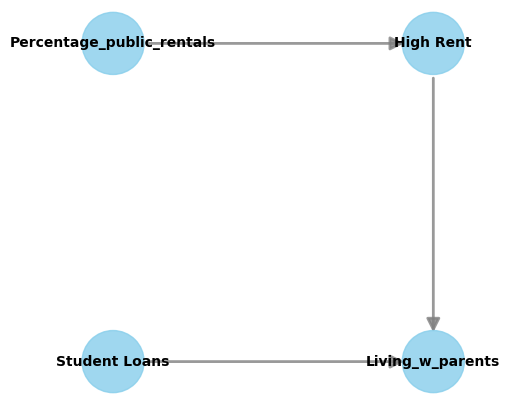

In [236]:
import networkx as nx
from dowhy.utils import plot

causal_graph = nx.DiGraph([('Percentage_public_rentals', 'High Rent'),
                           ('Student Loans', 'Living_w_parents'),
                           ('High Rent', 'Living_w_parents')])


plot(causal_graph)

In [237]:
from main_import import process_country

df_outcome_2010, df_outcome_2020 = process_country('Netherlands')
print(df_outcome_2010)

ImportError: cannot import name 'process_country' from 'main_import' (/Users/annelouisedeboer/Documents/GitHub/Causality_Eurostat-1/main_import.py)

# Treatment variable

Financial Aid or Support: Analyzing the impact of financial assistance or support programs for students on their living situations.

Housing Policies: Investigating the effect of housing policies or initiatives targeted specifically at students or young adults.

Distance from Home: Exploring whether the geographical distance between a student's educational institution and their parental home influences the likelihood of living with parents.

Employment Opportunities: Assessing how job availability or employment opportunities affect students' decisions to live independently or with their parents.

Educational Factors: Investigating the impact of educational programs, such as internship requirements, study abroad opportunities, or co-op programs, on students' living arrangements.

Temporal Relationship: Ensure that the change in financial aid availability occurred distinctly between the two time periods (2010 and 2020).

Control for Confounders: Try to control for other factors that might have changed between these periods and could also influence the outcome variable. For instance, changes in economic conditions, cultural shifts, housing availability, or societal norms might have affected the living arrangements of students.

Data Quality: Ensure the quality and comparability of data across both time periods. Differences in data collection methods, definitions, or accuracy could confound the analysis.

Sample Representativeness: Confirm that the student populations in 2010 and 2020 are comparable in terms of demographics, geographical distribution, and other relevant characteristics.

Other Influential Factors: Recognize that while the time difference (availability of financial aid) might be a primary factor, other changes in society, education, or housing markets between 2010 and 2020 might also impact the outcome variable.